# Convolution and Filtering in the Time Domain

In this section, we are going to return to filtering in the time domain and use the knowledge we have gained about convolution and the convolution theorem to gain insight into filtering methods that we discussed, such as the running-mean filter.

## Convolution as a Method of Filtering

Recall that in the previous section, we saw that the convolution is really just a sliding window, or, a sliding weighted average. This sounds just like filtering or smoothing in the time domain! For example, a running-mean filter, is simply a sliding weighted average of size $L$ applied over a time series.

If $y(t)$ is our original time series and $g(t)$ is the weighing function (e.g. a filter or window such as boxcar, gaussian, etc.), then the filtered time series $y(t)_{filtered}$ is the convolution of $y(t)$ and $g(t)$,

$$
\begin{align}
y(t)_{filtered} &= (g * y)(t)\\
&= \int_{-\infty}^{\infty} g(\tau)y(t-\tau) \,d\tau\\
\end{align}
$$

Thus, using the convolution theorem, the Fourier Transform of the filtered time series, $y(t)_{filtered}$ is,

$$
\begin{align}
\mathcal{F}(y(t)_{filtered})& = \mathcal{F}(y(t)*g(t))\\
&= \mathcal{F}(y(t))\mathcal{F}(g(t))\\
& = \mathcal{Y}(\omega)\mathcal{G}(\omega)
\end{align}
$$

*Ideal Filter*:

Suppose we want to low-pass filter the time series, $y(t)$. The Fourier Transform of an ideal filter, $\mathcal{G}(\omega)$, should be such that all low-frequencies are retain and all high-frequencies are set to zero. Graphically, the response function of an ideal filter should look like the plot below, for the situation where we have monthly data and we want to low-pass filter out frequencies higher than 12 months.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.signal as sig

In [2]:
# Response function for ideal filter with L = 12
L = 12
# time variable
t = np.arange(1,20*L+1,1)
# frequency
freqr = 2*np.pi*np.arange(1,int(len(t))+1)/len(t)

# response function
ideal_response = np.zeros(len(freqr))
ideal_response[0:20]= np.ones(len(freqr[0:20]))

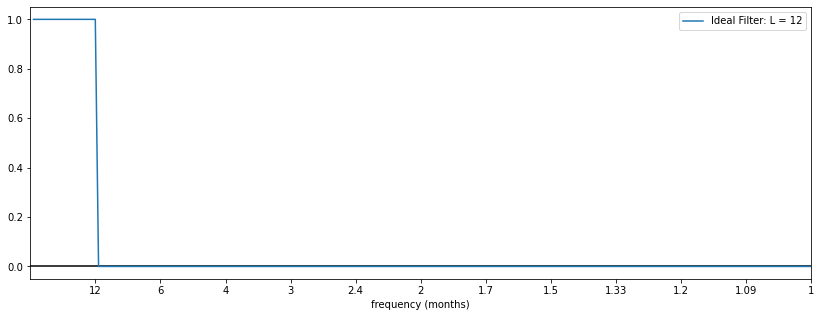

In [3]:
# plot response functions for running-mean filter with L = 12
plt.figure(figsize=(14,5))
plt.axhline(0,color='k')
plt.plot(freqr,ideal_response,label = 'Ideal Filter: L = 12')
plt.xlim(0,freqr[-1])
plt.xticks([freqr[19],freqr[39],freqr[59],freqr[79],freqr[99],freqr[119],freqr[139],
            freqr[159],freqr[179],freqr[199],freqr[219],freqr[239]],
           ["12","6","4","3","2.4","2","1.7","1.5","1.33","1.2","1.09","1"])
plt.xlabel('frequency (months)')
plt.legend()

*Running-Mean Filter*:

If $g(t)$ is a running-mean filter, then this is essentially the same thing as the boxcar window that we saw in the previous section. In other words,

$$
\mathcal{G}(\omega) = sinc(\omega L/2\pi)
$$

where $L$ is the length of the running-mean filter. Note that,

$$
\mathcal{G}(\omega) = 0 \quad \text{when $\omega L$ = 2$\pi$, 4$\pi$, 6$\pi$, that is, when you have 1 cycle/$L$, 2 cycles/$L$, 3 cycles/$L$
}
$$

So, if you apply a 12-month running mean to monthly data, you will exactly remove the 12-month cycle, the 6-month cycle, the 4-month cycle, etc. Thus, you do not perfectly remove all frequencies higher than $L$ = 12.

In addition, the side lobes of the $sinc$ response function cause additional problems. These will phase shift your frequencies between these perfectly removed harmonics, leading to *spectral leakage* to other frequencies.

Let's remind ourselves of what a boxcar response function looks like:

Let's construct it like a running mean filter, with $L$ = 12, assuming we have monthly data and we want to filter out the seasonal cycle.

In [4]:
# Response function for running-mean filter with L = 12
L = 12
# time variable
t = np.arange(1,20*L+1,1)
# frequency
freqr = 2*np.pi*np.arange(1,int(len(t))+1)/len(t)

bxcr_response= np.sinc(freqr*L/(2*np.pi))

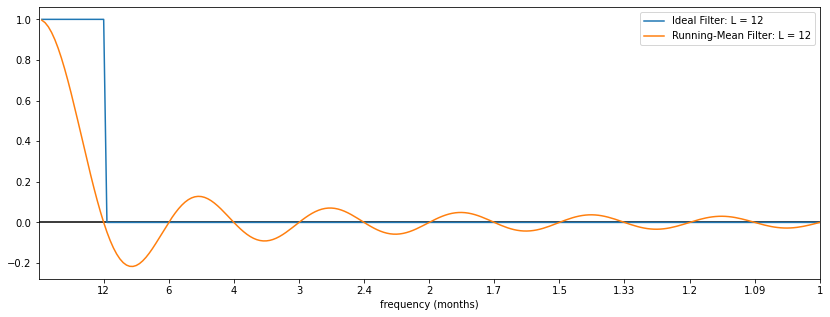

In [5]:
# plot response functions for running-mean filter with L = 12
plt.figure(figsize=(14,5))
plt.axhline(0,color='k')
plt.plot(freqr,ideal_response,label = 'Ideal Filter: L = 12')
plt.plot(freqr,bxcr_response,label = 'Running-Mean Filter: L = 12')
plt.xlim(0,freqr[-1])
plt.xticks([freqr[19],freqr[39],freqr[59],freqr[79],freqr[99],freqr[119],freqr[139],
            freqr[159],freqr[179],freqr[199],freqr[219],freqr[239]],
           ["12","6","4","3","2.4","2","1.7","1.5","1.33","1.2","1.09","1"])
plt.xlabel('frequency (months)')
plt.legend()

So, what this response function illustrates is that a time series filtered using a running-mean filter will exactly filter out the 12-month frequency and retain the lower frequencies, but these will be smoothed out. The filter does not maintain all the power contained in these low frequencies because the response function decays from a value of 1 to 0 over the lower frequency range. In addition, a time series filtered using a running-mean filter will have some high frequencies removed (note that the response function is 0 for 6-months, 4-months, 3-months, etc.) but it still contain other high frequencies due to the oscillatory side lobes. Thus, the running-mean filter is not a pure low-pass filter.

As we saw in the previous section, we can use alternative windows or filters to alleviate some of these issues and attempt to approach the ideal filter response function. An in-depth discussion of how this is done is beyond the scope of this course, but the *Gaussian* filter that was mentioned in the first section, is one such alternative. 

Filtering in the *frequency domain* and then applying the inverse Fourier Transform is another alternative - as we have seen in a previous section.